# CSE688: Practical and Application of Machine Learning - Spring 2021
## Assignment 1-2

#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
![cifar-10](assets/cifar-10.png)

#### Build a CNN model regarding below.

| Type       | Kernel size(or pooling size) | Output channel | Stride | Padding  |
|------------|------------------------------|----------------|--------|----------|
| Conv2D     | 3x3                          | 32             | 1x1    | The same |
| ReLU       |                              |                |        |          |
| MaxPooling | 2x2                          | --             | 2x2    | The same |
| Dropout    | 25%                          |                |        |          |
| Conv2D     | 3x3                          | 64             | 1x2    | The same |
| ReLU       |                              |                |        |          |
| MaxPooling | 2x2                          | --             | 2x2    | The same |
| Dropout    | 25%                          |                |        |          |
| Flaten     |                              |                |        |          |
| Dense      | Output size = 1024           |                |        |          |
| Dropout    | 25%                          |                |        |          |
| Dense      | Output size = 1024           |                |        |          |
| Dropout    | 25%                          |                |        |          |
| Dense      | Output size = 10             |                |        |          |


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

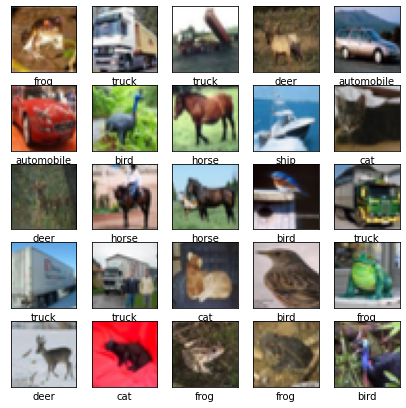

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 7, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8331 - accuracy: 0.3298 - val_loss: 1.3629 - val_accuracy: 0.5084
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4168 - accuracy: 0.4963 - val_loss: 1.2234 - val_accuracy: 0.5700
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3283 - accuracy: 0.5315 - val_loss: 1.2952 - val_accuracy: 0.5335
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2648 - accuracy: 0.5556 - val_loss: 1.1910 - val_accuracy: 0.5881
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2438 - accuracy: 0.5639 - val_loss: 1.2108 - val_accuracy: 0.5856
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2121 - accuracy: 0.5713 - val_loss: 1.1479 - val_accuracy: 0.5919
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1920 - accuracy: 0.5830 - val_loss: 1.1546 -

313/313 - 1s - loss: 1.1683 - accuracy: 0.5895


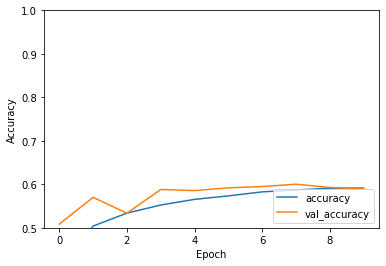

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)